# Data Analysis

## Load data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_name = ["Sex", "Length" ,"Diameter" ,"Height" ,"WholeWeight" ,"ShuckedWeight", "VisceraWeight", "Shell weight", "Rings"]

In [3]:
data = pd.read_csv('abalone.data', names = column_name)

In [4]:
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
sr = {}
for i, s in enumerate(data['Sex']):
    r = data['Rings'][i]
    if s == 'M':
        key = 'Male'
    elif s == 'F':
        key = 'Female'
    elif s == 'I':
        key = 'Infant'
    if sr.get(key) == None:
        sr[key] = [r]
    else:
        sr[key].append(r)

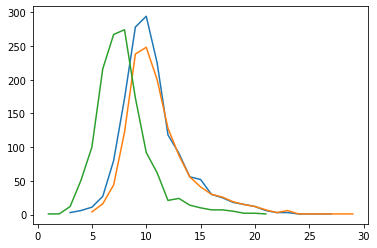

In [6]:
sr_data = []
for idx, key in enumerate(sr.keys()):
    x = set(sr[key])
    y = list(map(lambda x: sr[key].count(x), list(x)))
    sr_data.append((list(x), y))
plt.plot(sr_data[0][0], sr_data[0][1], sr_data[1][0], sr_data[1][1], sr_data[2][0], sr_data[2][1])

In [7]:
bx = list(range(31))

In [8]:
data['Sex'] = data['Sex'].replace('M', 0)
data['Sex'] = data['Sex'].replace('F', 1)
data['Sex'] = data['Sex'].replace('I', 2)

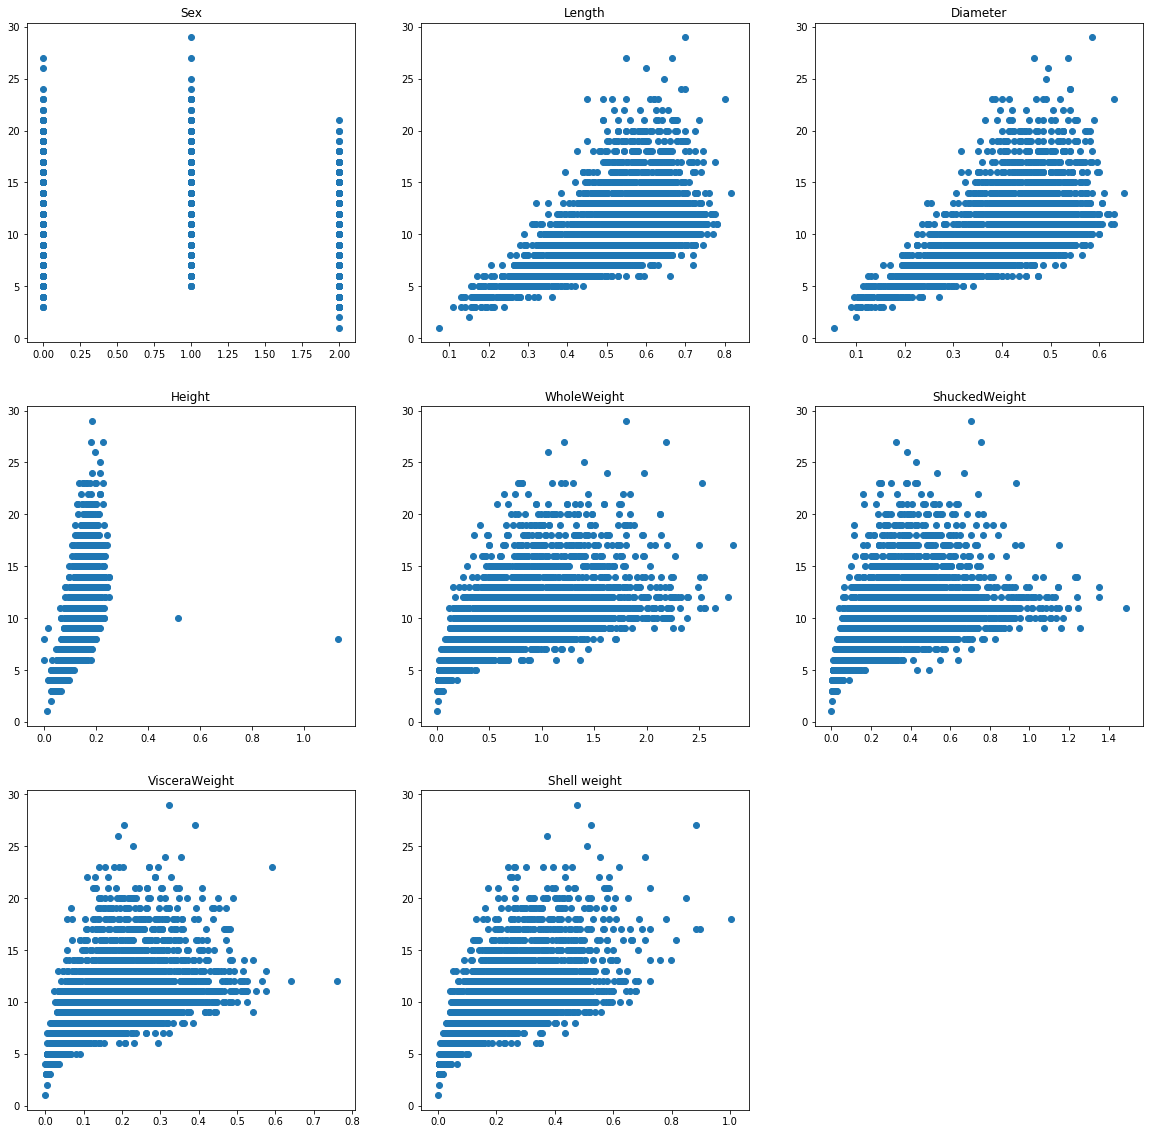

In [9]:
plt.figure(figsize=(20, 20))
for idx, (key, val) in enumerate(data.items()):
    if key != 'Rings':
        plt.subplot(3, 3, idx+1)
        plt.scatter(val, data['Rings'])
        plt.title(key)

In [10]:
datas = {}
for key, val in data.items():
    if key != 'Rings' and key != 'Sex':
        datas[key] = ([],[])
        temp = {}
        for idx, v in enumerate(val):
            if temp.get(v) == None:
                temp[v] = [v, data['Rings'][idx], 1]
            else:
                temp[v][2] += 1
        for tv in sorted(temp.values(), key=lambda x: x[0]):
            datas[key][0].append(tv[0])
            datas[key][1].append(tv[1])

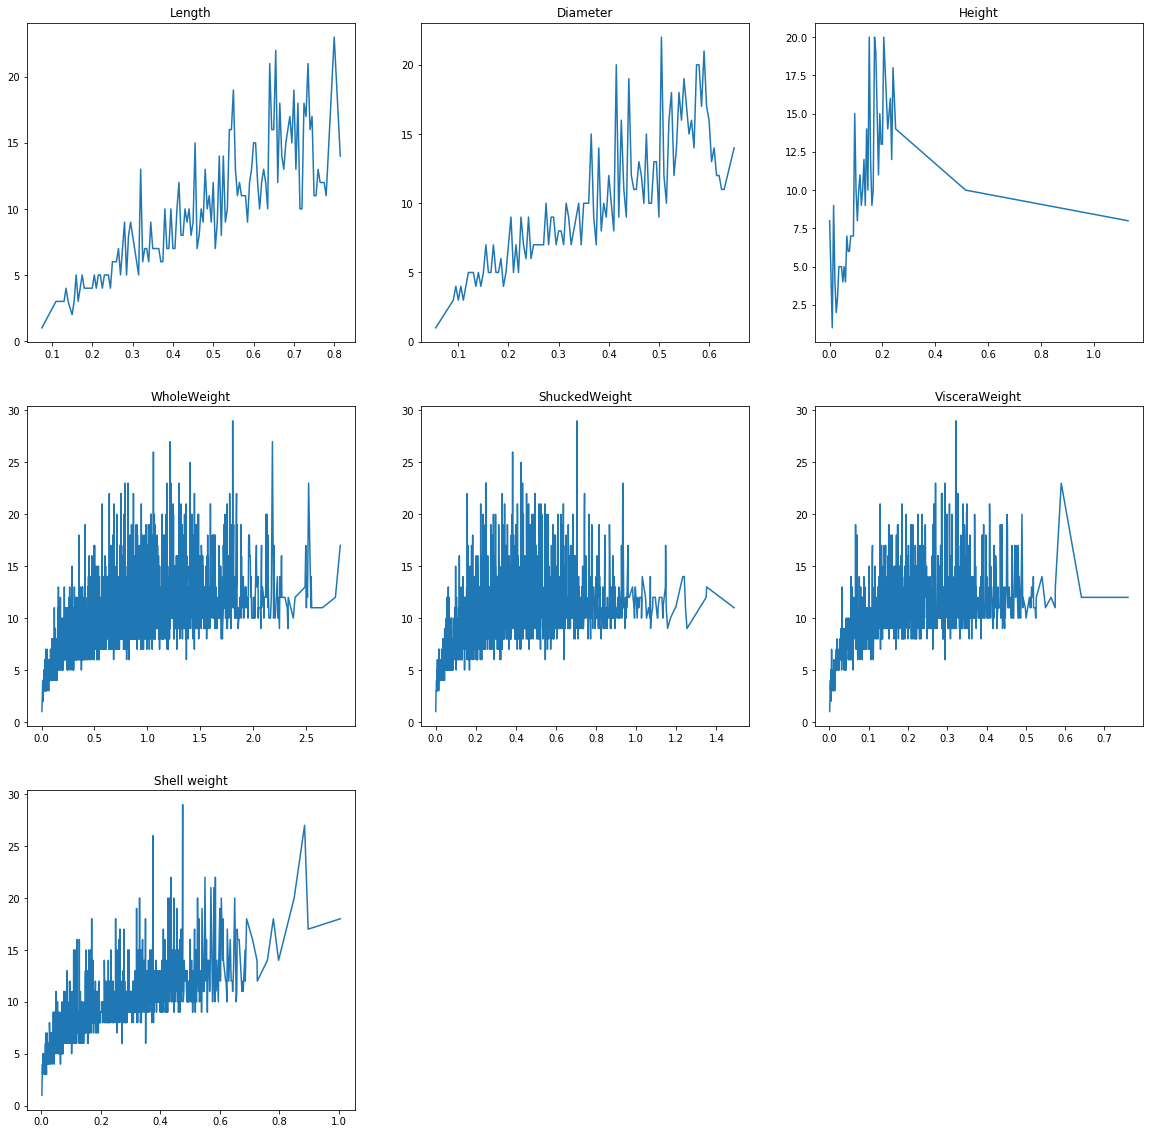

In [11]:
plt.figure(figsize=(20,20))
for idx, (key, val) in enumerate(datas.items()):
    plt.subplot(3, 3, idx+1)
    plt.plot(val[0], val[1])
    plt.title(key)

In [12]:
corr_matrix = data.corr()

In [13]:
corr_matrix["Rings"]

Sex             -0.351822
Length           0.556720
Diameter         0.574660
Height           0.557467
WholeWeight      0.540390
ShuckedWeight    0.420884
VisceraWeight    0.503819
Shell weight     0.627574
Rings            1.000000
Name: Rings, dtype: float64

In [21]:
data.describe()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


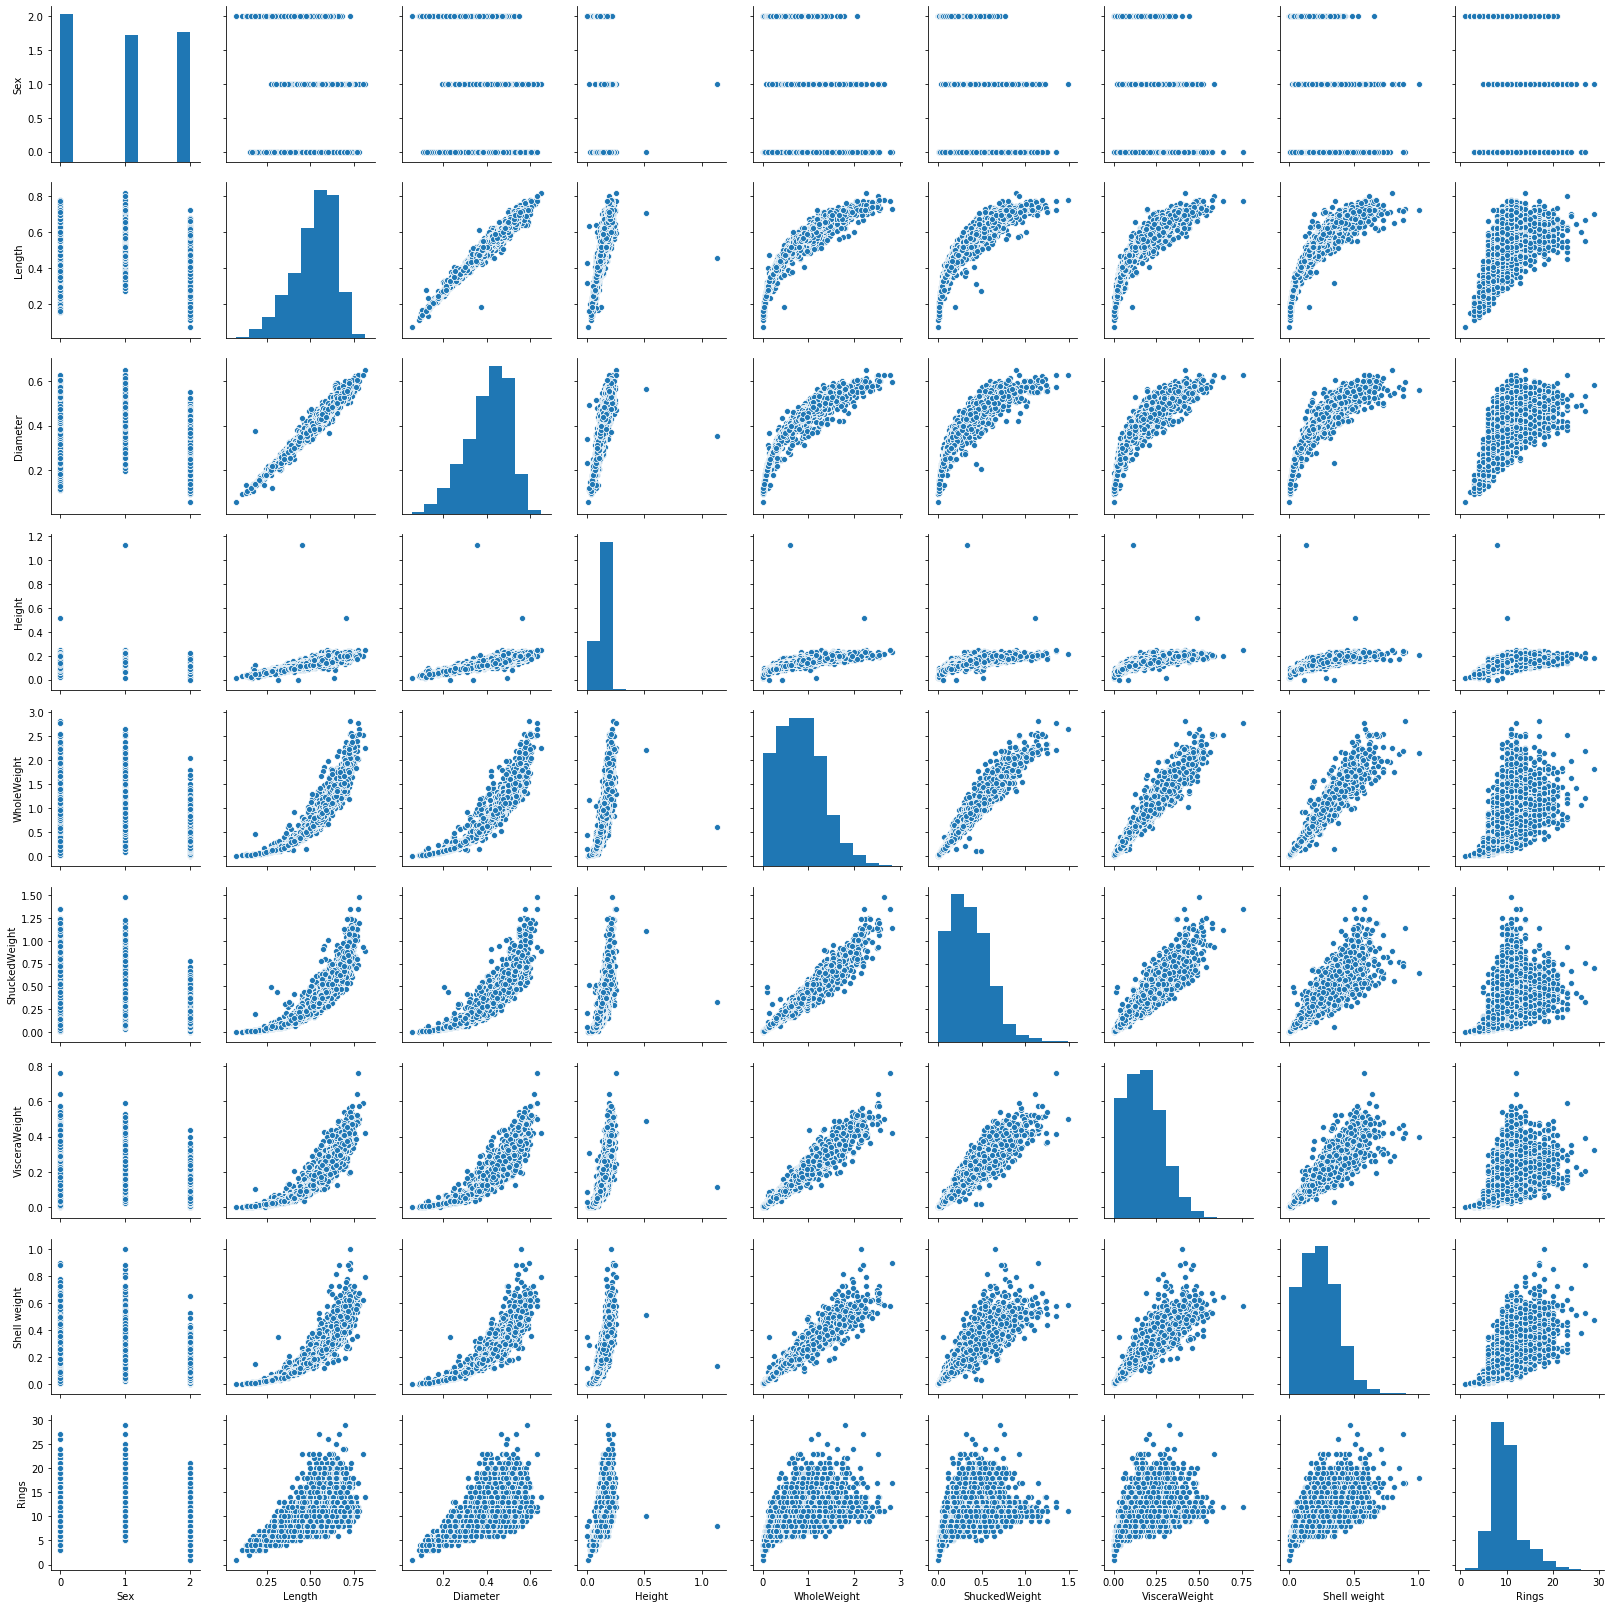

In [25]:
g = sns.pairplot(data)